# Entorno de trabajo

Puesta en marcha de Python, jupyter notebooks y OpenCV.

Usaremos la distribución "Anaconda", que se instala en cualquier directorio sin necesidad de privilegios de administración.

## Instalación

Clonamos [el repositorio](https://github.com/albertoruiz/umucv) con el material de la asignatura:

    git clone https://github.com/albertoruiz/umucv.git
    
En días sucesivos lo iremos actualizando con

    git pull
    
Otra posibilidad es descargar solo [la versión más reciente](https://github.com/albertoruiz/umucv/archive/master.zip):

    wget https://github.com/albertoruiz/umucv/archive/master.zip
    unzip master.zip

### LINUX

Descargamos [miniconda](https://conda.io/miniconda.html) para nuestro sistema con python 3 y lo instalamos:

    bash Miniconda3-latest-Linux-x86_64.sh

Nos preguntará si queremos inicializar la instalación (sí), y nos indicará la forma de configurarlo para que los terminales no arranquen automáticamente dentro del entorno base.

Una vez instalado hay que cerrar el terminal y abrir otro para que los cambios tengan efecto.

Comprobamos que está bien instalado:

    conda activate base

    (base) usuario @ maquina> python

    Python 3.9.5

Creamos un [entorno de conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) con todo lo necesario.

    conda create --name via python==3.8.5
    conda activate via
    pip install mediapipe pyqtgraph pyopengl pyqt5==5.14.1
    pip install jupyter matplotlib scikit-learn scikit-image pydot

Usaremos también dlib, que tarda un buen rato en compilar, pero podemos instalar una versión precompilada mediante el script `install_dlib.sh` (en la microaula usa `install_dlib_lab.sh`). Y necesitaremos tensorflow. La versión concreta se indicará más adelante.

En muchos ejercios y ejemplos de código usaremos un paquete con funciones de utilidad de la asignatura:

    pip install http://robot.inf.um.es/material/umucv.tar.gz  

Podemos añadir al final de nuestro `.bashrc` una orden `conda activate via` para que los terminales que abramos estén automáticamente en el entorno deseado.

Una opción interesante es instalar el sistema en un pendrive de modo que se pueda utilizar inmediatamente en cualquier ordenador (con linux) sin necesidad de instalar nada. Si estás interesado en esta solución consulta los detalles al profesor.

### WINDOWS

Instalamos [anaconda completo](https://www.anaconda.com/distribution/#download-section).

En anaconda prompt ejecutamos
    
    python -m pip install mediapipe
    
    python -m pip install pyqtgraph pyopengl PySide2 PyQt5
    
    conda install -c conda-forge dlib
    
    python -m pip install http://robot.inf.um.es/material/umucv.tar.gz  

Para comprobar que la instalación es correcta abrimos un nuevo anaconda prompt, nos cambiamos al subdirectorio de la asignatura y ejecutamos algunos programa de prueba:

    cd ubicacion/del/repositorio/umucv/code
    python webcam.py
    python stream.py
    python stream.py --dev=../images/rot4.mjpg
    python surface.py
    

Otra posibilidad es utilizar el Subsistema Linux de Windows (WSL), como se explica en [este notebook](WSL.ipynb) realizado por vuestro compañero Vladyslav Grechyshkin.

### MAC

Las instrucciones de instalación se explican en [este notebook](MAC.ipynb) realizado por vuestro compañero Eduardo Salmerón Castaño.

Las instrucciones de instalación para el Mac M1 se explican en [este notebook](MAC-M1.ipynb) realizado por vuestro compañero José Luis Mellina Andreu.

### COLAB

Podemos abrir los notebooks en las máquinas de google, que tienen instalados casi todos los paquetes necesarios. (Hay que descargar cada vez las imágenes de ejemplo y otros archivos auxiliares o leerlos de ubicaciones remotas.) Son especialmente útiles para experimentos de Deep Learning porque permiten utilizar GPUs y TPUs.

[https://colab.research.google.com/github/albertoruiz/umucv/blob/master/notebooks/VIA.ipynb](https://colab.research.google.com/github/albertoruiz/umucv/blob/master/notebooks/VIA.ipynb)

## Prueba rápida

En primer lugar importamos las bibliotecas necesarias.

In [1]:
# %matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from skimage import io

Para importar una imagen podríamos usar `imread` de opencv. El problema es que intercambia los canales R y B:

In [2]:
img = cv.imread('../images/coins.png')
print(type(img))
print(img.shape)
#print(img)

<class 'numpy.ndarray'>
(600, 800, 3)


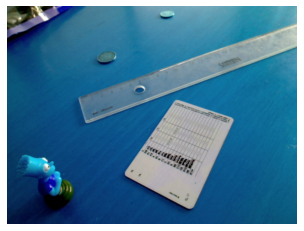

In [3]:
plt.imshow(img)
plt.axis('off');

Para arreglarlo usamos la función que convierte espacios de color.

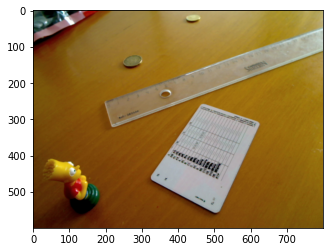

In [4]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));

Podemos intercambiar los canales aprovechando las posibilidades de indexado de arrays de numpy:

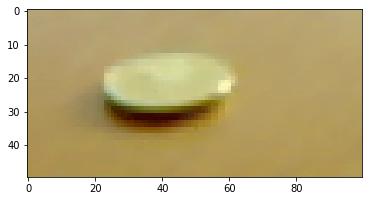

In [5]:
plt.imshow(img[:50,400:500,[2,1,0]]);

Pero es más sencillo usar `imread` de skimage, que además puede leer de url remotas.

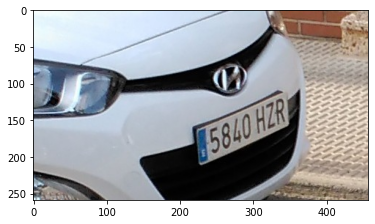

In [6]:
path = "https://github.com/albertoruiz/umucv/raw/master/images/"

view = io.imread(path+"plate.jpg")
plt.imshow(view);

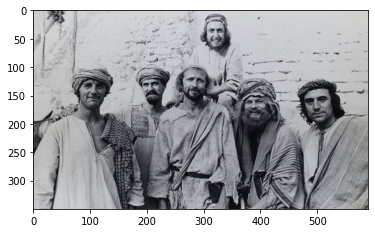

In [7]:
plt.imshow(io.imread("../images/monty-python1.jpg"));

## Ejemplos de código

En un terminal:

    cd path/to/umucv/code
    
    ./stream.py --dev=../images/rot4.mjpg

Si tienes una webcam conectada:

    ./surface.py

    ./facemesh.py

Otros ejemplos:

    cd pose
    ./pose3D.py      --dev=../images/rot4.mjpg
    ./pose_opengl.py --dev=../images/rot4.mjpg
    cd ..
    
    cd ../data
    ./get.sh
    cd  ../code/hog
    ./facelandmarks.py